<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Objective is to divide n points into k clusters
# for our example, let's assume k=3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
# MATPLOTLIB => instead of using official definition, use local definition
# local def is from Google Colab, Anaconda or Jupyter or iPython 

In [0]:
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,52,45,51,52,55,53,55,61,65,66,72,22],
    'y':[39, 35, 30, 52, 55, 53, 46, 55, 59, 63,70, 66,63,58,23,14,8,19,7,24]
})

In [0]:
np.random.seed(42) # random is pseudorandom! that's why np.random instead of random.random
k = 3 # __init__(self,k=5): self.k = k; alternately command line argument! argv!
# choose random k centroids
# centroid logic, feel free to experiment with a diff logic
centroids = {
   i+1: [np.random.randint(0,80), np.random.randint(0,80)] for i in range(k)
}




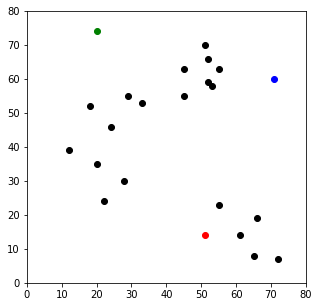

In [14]:
# plot the points and centroids, plot only during dev/test, of course not in production
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color='k')
cdic = {1:'r',2:'b',3:'g'}
for i in centroids.keys():
  plt.scatter(*centroids[i],color=cdic[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [0]:
def doWork(df, centroids):
  for i in centroids.keys():
    #SQUARED ROOT DISTANCE
    df['distance_from_{}'.format(i)] = (np.sqrt((df['x']-centroids[i][0])**2 +(df['y']-centroids[i][1])**2 ))
    centroid_dis_cols = ['distance_from_{}'.format(i) for i in centroids.keys()] # list of col names that we need
    df['closest'] = df.loc[:,centroid_dis_cols].idxmin(axis=1) # axis control dimension of data, this means, create new col
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: cdic[x])
    return df
    
# 1)distance_from_1 : 25, distance_from_2:45, distance_from_3: 15
# 2)closest: "distance_from_3"
# 3)closest: 3
# 4)color: g

In [18]:
df_modified = doWork(df, centroids)
df_modified.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,x,y,distance_from_1,closest,color
0,12,39,46.324939,1,r
1,20,35,37.443290,1,r
2,28,30,28.017851,1,r
3,18,52,50.328918,1,r
4,29,55,46.529560,1,r
